# Load Libaries


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load Data

In [35]:
df = pd.read_csv(r'C:\Users\theol\\OneDrive\\Documents\\IT\\week_1\\Updated_sales.csv')

In [36]:
print(df.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


# Missing values and Dirty Rows

In [37]:
rows_all_nan = df[df.isna().all(axis=1)]
print("rows_all_nan:", rows_all_nan)

rows_all_nan:       Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1          NaN     NaN              NaN        NaN        NaN              NaN
356        NaN     NaN              NaN        NaN        NaN              NaN
735        NaN     NaN              NaN        NaN        NaN              NaN
1433       NaN     NaN              NaN        NaN        NaN              NaN
1553       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
28132      NaN     NaN              NaN        NaN        NaN              NaN
28879      NaN     NaN              NaN        NaN        NaN              NaN
29097      NaN     NaN              NaN        NaN        NaN              NaN
29247      NaN     NaN              NaN        NaN        NaN              NaN
29257      NaN     NaN              NaN        NaN        NaN              NaN

[87 rows x 6 columns]


In [38]:
df = df.dropna(how='all')

In [39]:
df.shape

(30307, 6)

# Data Type Conversion

In [41]:
# Convert Quantity Ordered to Interger
df["Quantity Ordered"] = pd.to_numeric(
    df["Quantity Ordered"], errors='coerce'
    ).astype('Int64')

# Convert Price Each to Float
df["Price Each"] = pd.to_numeric(
    df["Price Each"], errors='coerce'
    )

# Convert Order Date to Datetime
df["Order Date"] = pd.to_datetime(
    df["Order Date"], errors='coerce'
    )


C:\Users\theol\AppData\Local\Temp\ipykernel_12884\300820363.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(


In [42]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             Int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [44]:
print(df.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  


In [45]:
print(df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


# Standardization & Inconsistency

In [46]:
# Strip whitespace from column

text_cols = df.select_dtypes(include=['object']).columns
df[text_cols] = df[text_cols].apply(lambda col: col.str.strip())

# Standardize Product Names

df['Product'] = df['Product'].str.title()

In [48]:
# Rename columns to Snake Case

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_", regex=False)
    
    )

In [51]:
print(df.head())

  order_id                     product  quantity_ordered  price_each  \
0   176558        Usb-C Charging Cable                 2       11.95   
2   176559  Bose Soundsport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           order_date                      purchase_address  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  


# Feature Engineering (Business Value)

In [52]:
# Sales

df["sales"] = df["quantity_ordered"] * df["price_each"]

# Order Month

df["order_month"] = df["order_date"].dt.month

# Order hour

df["order_hour"] = df["order_date"].dt.hour




In [55]:
address_split = df["purchase_address"].str.split(" , ")
df["city"] = address_split.str[1]
# Use fillna to handle missing values before calling .str operations
df["state"] = address_split.str[2].fillna("").str.split(" ").str[0]

In [56]:
df[["purchase_address", "city", "state"]].head()

,purchase_address,city,state
0,"917 1st St, Dallas, TX 75001",NaN,
2,"682 Chestnut St, Boston, MA 02215",NaN,
3,"669 Spruce St, Los Angeles, CA 90001",NaN,
4,"669 Spruce St, Los Angeles, CA 90001",NaN,
5,"333 8th St, Los Angeles, CA 90001",NaN,


In [58]:
print(df.head())

  order_id                     product  quantity_ordered  price_each  \
0   176558        Usb-C Charging Cable                 2       11.95   
2   176559  Bose Soundsport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           order_date                      purchase_address  sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   23.9   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  600.0   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  11.99   

   order_month  order_hour  city state  
0          4.0         8.0   NaN        
2          4.0        22.0   NaN        
3          4.0        1

In [59]:
df["city"] = df["purchase_address"].str.extract(r",\s([^,]+),")
df["state"] = df["purchase_address"].str.extract(r",\s[^,]+,\s([A-Z]{2})")

In [60]:
df[["purchase_address", "city", "state"]].head()

,purchase_address,city,state
0,"917 1st St, Dallas, TX 75001",Dallas,TX
2,"682 Chestnut St, Boston, MA 02215",Boston,MA
3,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
5,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA


In [61]:
print(df.head())

  order_id                     product  quantity_ordered  price_each  \
0   176558        Usb-C Charging Cable                 2       11.95   
2   176559  Bose Soundsport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           order_date                      purchase_address  sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   23.9   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  600.0   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001  11.99   

   order_month  order_hour         city state  
0          4.0         8.0       Dallas    TX  
2          4.0        22.0       Boston    MA  
3 

# Aggregations & Business Insights

In [63]:
# Group by Month (Total sales)

monthly_sales = (
    df.groupby("order_month", as_index=False)["sales"]
    .sum()
    .sort_values("sales", ascending=False)

)
monthly_sales

,order_month,sales
0,4.0,3385499.82
2,8.0,2242315.57
1,5.0,10559.29
3,9.0,2096.74


# Visualization

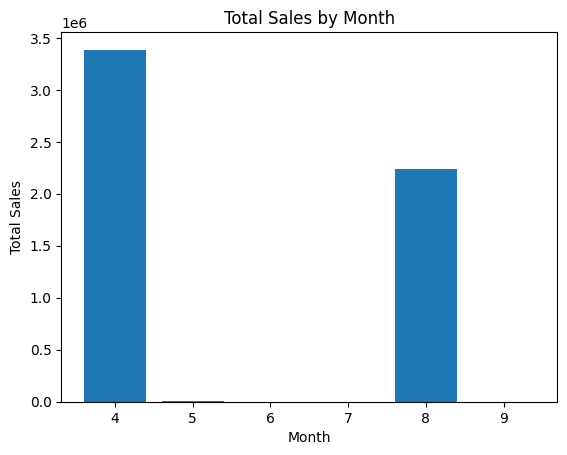

In [65]:
plt.figure()
plt.bar(monthly_sales["order_month"], monthly_sales["sales"])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.show()

# Regression Analysis 

In [72]:
# Prepare Features (X) and Target (Y)

X = df[["price_each", "quantity_ordered"]]
Y = df["sales"]

# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
    )


In [81]:
model_df =df[["price_each", "quantity_ordered", "sales"]].dropna()

X = model_df[["price_each", "quantity_ordered"]]
y = model_df["sales"]

In [83]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [85]:
# Train the model

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
# Model coefficients (interpretation)

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
        
    })

intercepts = model.intercept_


coefficients, intercepts

(            Feature  Coefficient
 0        price_each     1.001843
 1  quantity_ordered     7.266256,
 np.float64(-7.32837152695285))

In [88]:
# Make Predictions

y_pred = model.predict(X_test)

In [92]:
# Evaluate the model

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2:", r2)
print("RMSE:", rmse)

r2: 0.9945435417686348
RMSE: 24.11058572516123


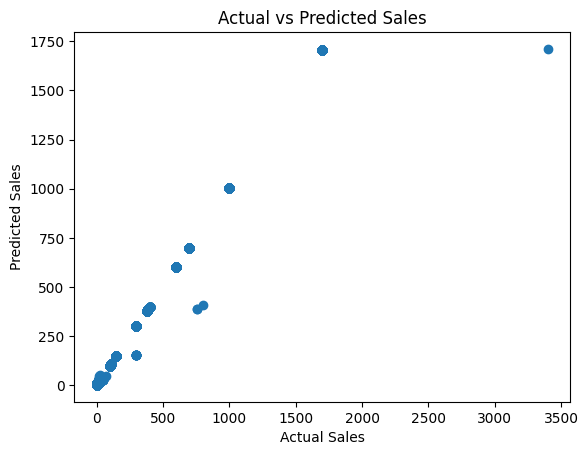

In [93]:
# VISUALIZATION OF PREDICTIONS VS ACTUAL VALUES

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()